In [2]:
library(R2jags)
smoking<-read.table("smoking.txt", header=TRUE, sep="")
smoking

Id,Age,FEV,Hgt,Male,Smoke
<int>,<int>,<dbl>,<dbl>,<int>,<int>
301,9,1.708,57.0,0,0
451,8,1.724,67.5,0,0
501,7,1.720,54.5,0,0
642,9,1.558,53.0,1,0
901,9,1.895,57.0,1,0
1701,8,2.336,61.0,0,0
1752,6,1.919,58.0,0,0
1753,6,1.415,56.0,0,0
1901,8,1.987,58.5,0,0


a) Exploratory data analysis

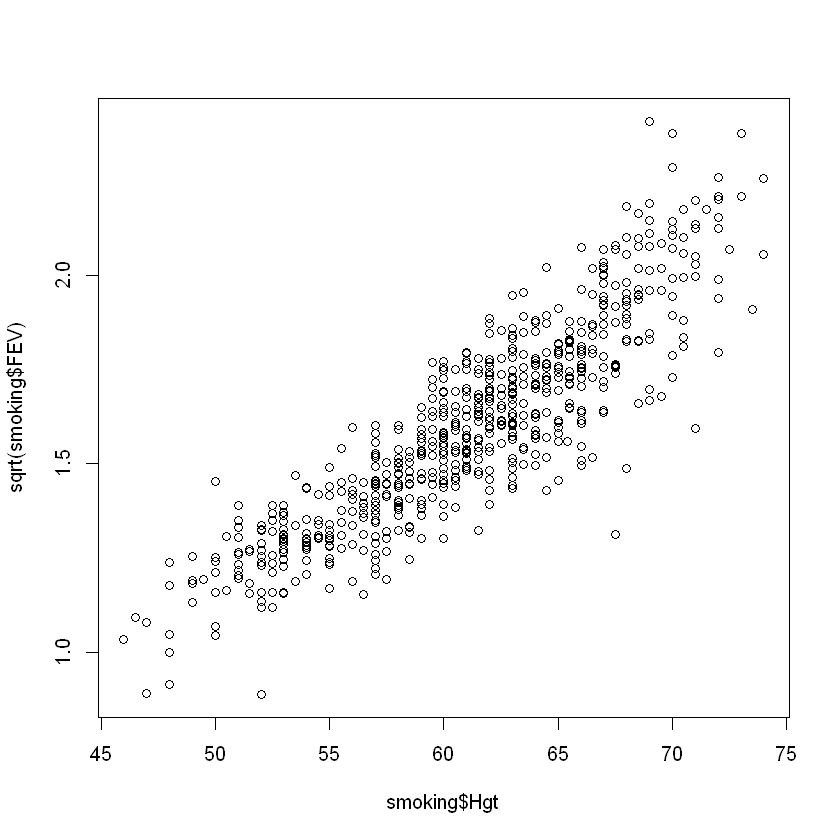

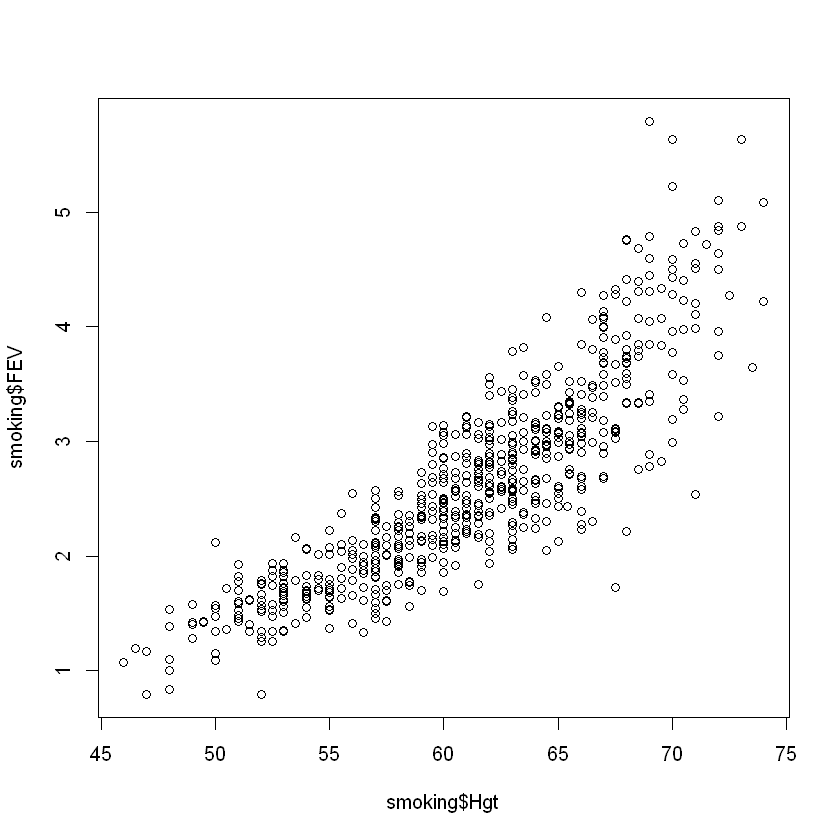

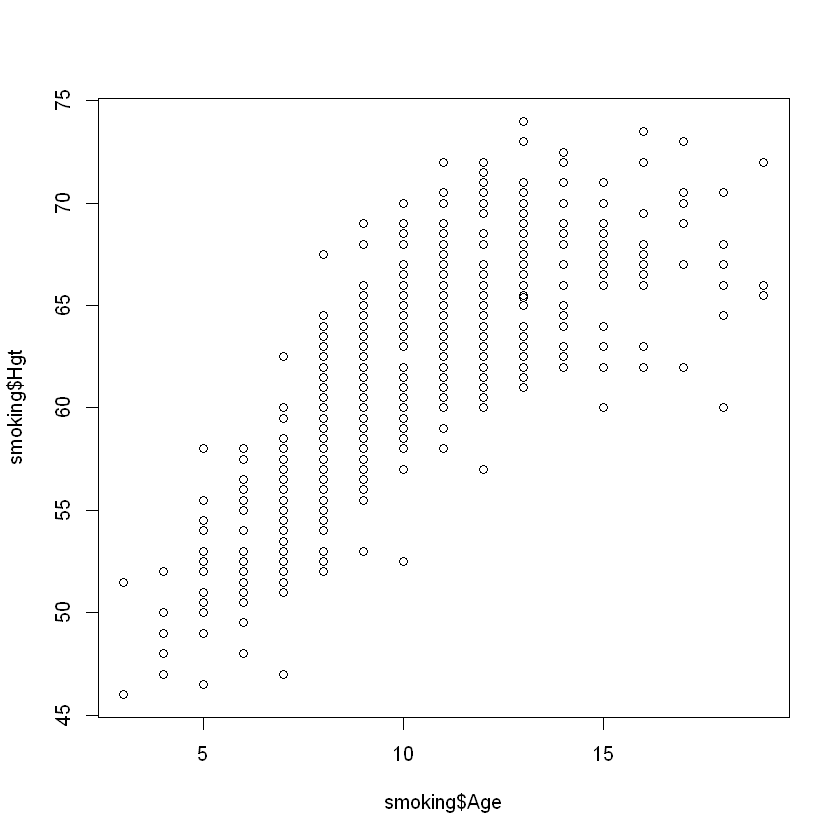

In [128]:
plot(smoking$Hgt,sqrt(smoking$FEV)) 
plot(smoking$Hgt,smoking$FEV) 
plot(smoking$Age, smoking$Hgt)

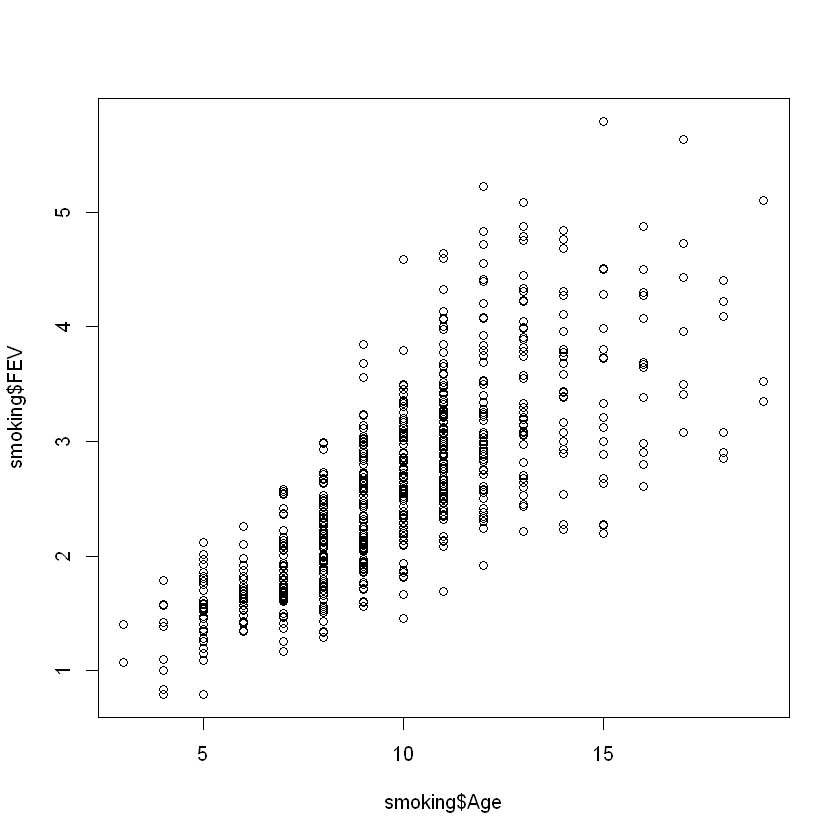

In [5]:
plot(smoking$Age, smoking$FEV)

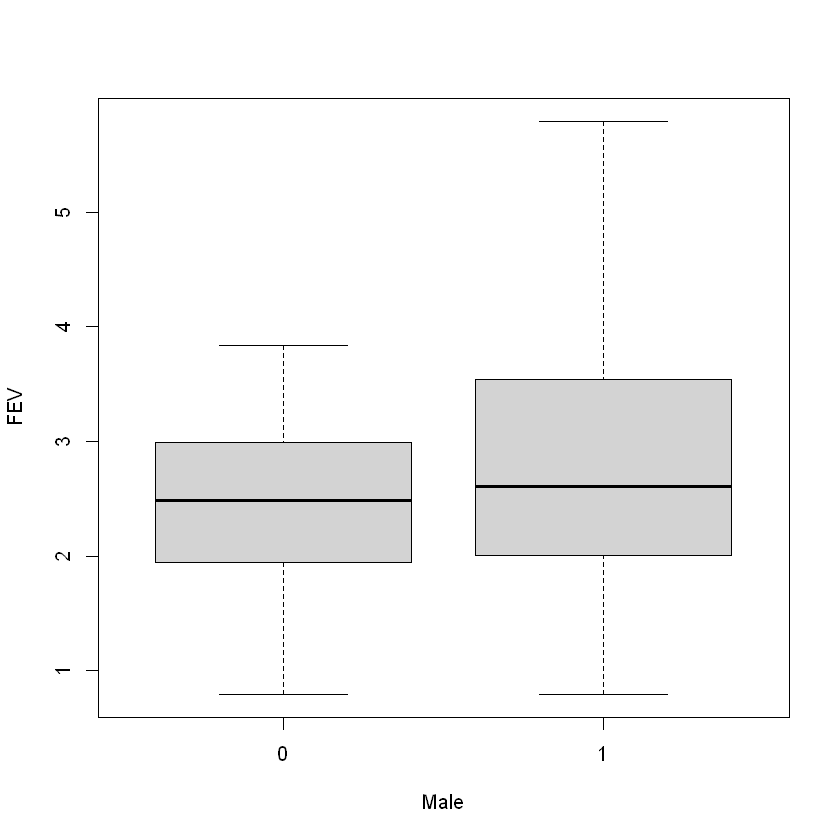

In [6]:
boxplot(FEV ~ Male, data=smoking)

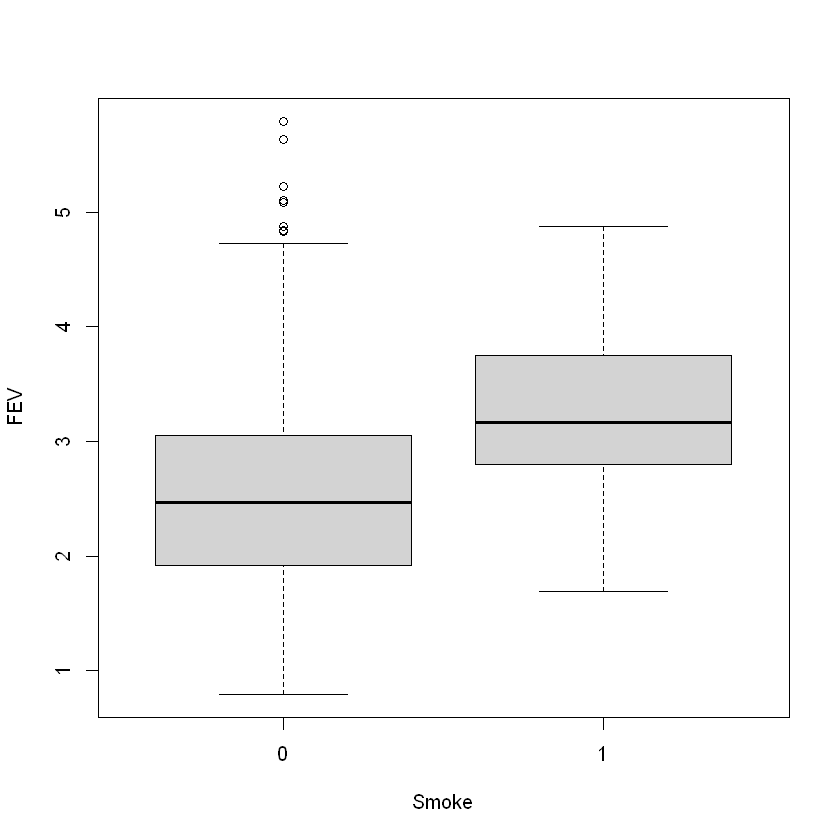

In [7]:
boxplot(FEV ~ Smoke, data=smoking)

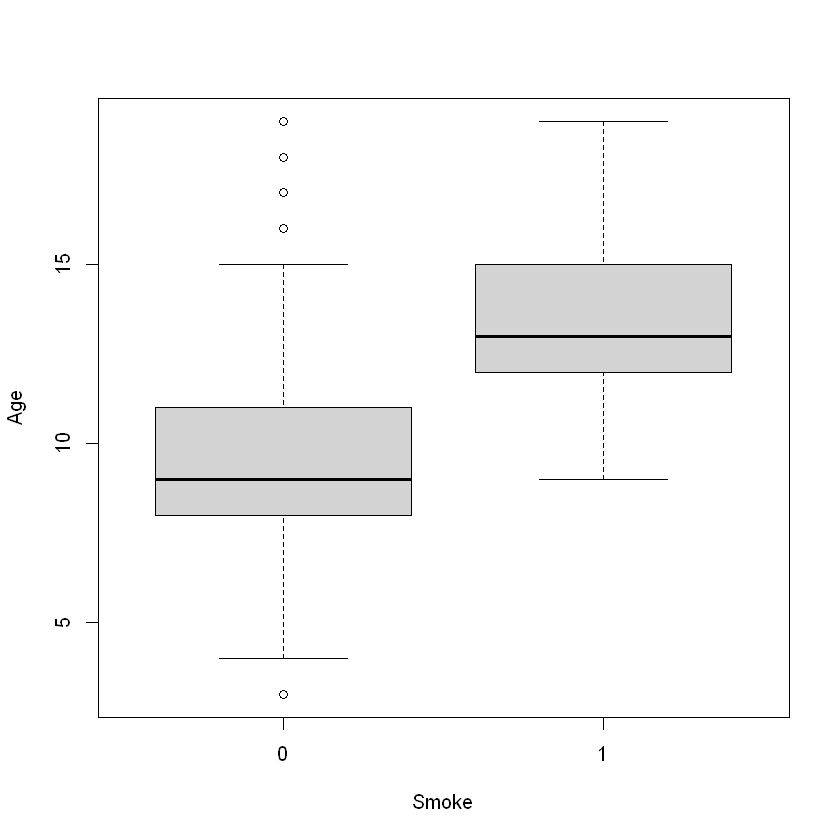

In [8]:
boxplot(Age ~ Smoke, data=smoking)

b) Discuss prior construction, predictor selection (consider interactions and higher order terms), convergence and model diagnostics.

We know from Dr. David Mannino what to expect for the mean and 99th percentile for FEV, for kids in 4 different categories. This is what is needed to construct our prior mean vector and our covariance vector. 

If you look at the graphs above you'll see that height seems to have a quadratic relationship with FEV, so I will mostly be using Height^2 in my models. The models I will try out: 

FEV ~ Age + Height + Male + Smoker

FEV ~ Age + Height^2 + Male + Smoker

FEV ~ Age + Height + Male + Smoker + Male$\cdot$Smoker

FEV ~ Age + Height^2 + Male + Smoker + Male$\cdot$Smoker

FEV ~ Age + Height^2 + Smoker

FEV ~ Age + Height^2 + Male

FEV ~ Age + Height + Male

As far as my selection criterion, I will focus on DIC (i.e. I will consider the model with the lowest DIC to be the best model). DIC is easy to find from JAGS models by just doing model.fit\\$BUGSoutput\\$DIC. 

c) Present posterior inferences for regression parameters and subpopulation means in appropriately designed tables or figures. Based on your analysis, is smoking related to FEV?

Based on the analysis: the best performing model was FEV ~ Age + Height^2 + Smoker, while the two worst performing models had "Smoker" removed as a variable, so from this, I think it's reasonable to say that smoking is related to FEV. Something also potentially important to note is that models without the square term for height seem to do significantly worse. "Male" does not seem to be a variable that improves the model, and this is basically what we can expect from the boxplot done above: males and females have almost identical mean FEV values.   

DIC: 12.27, FEV ~ Age + Height + Male + Smoker

DIC: 10.54,  FEV ~ Age + Height^2 + Male + Smoker

DIC: 11.58,  FEV ~ Age + Height + Male + Smoker + Male$\cdot$Smoker

DIC: 11.94, FEV ~ Age + Height^2 + Male + Smoker + Male$\cdot$Smoker

DIC: 9.74, FEV ~ Age + Height^2 + Smoker

DIC: 13.81,  FEV ~ Age + Height^2 + Male

DIC: 17.23, FEV ~ Age + Height + Male

d) FEV predictions for different adolescents: (this used the best model from above, where sex was excluded as a factor)

Non-smoker 10 year old, 60 inches:----- 1.793   
Smoker 12 year old, 65 inches:----------1.515  
Smoker 15 year old, 68 inches:----------2.370   
Non-smoker 5 year old, 50 inches:-------1.886   

e) Discuss a sensitivity analysis:

I didn't have much time to do anything in depth but I tested a vague prior for the betas for the "best model" discussed above (i.e. dnorm(0, .001). From inspection, it does appear to be pretty sensitive to the choice of prior. With the prior from the expert, our coefficients are: 

beta[1] = 2.597   
beta[2] = 0.076   
beta[3]  = 0.000   
beta[4]  = 0.644   

While with the vague priors:

beta[1]  =  1.883   
beta[2] =  -0.041   
beta[3] =   0.000   
beta[4]  = -0.293  

**FEV ~ Age + Height + Male + Smoker**

In [112]:
age = c(18, 16, 13, 12, 0)
hgt = c(70, 70, 66, 70, 0)
male = c(0, 1, 1, 1, 0)
smoker = c(1, 0, 1, 0,0 )
X.mat=model.matrix(~age + hgt + as.factor(male) + as.factor(smoker), 5, 5, byrow = T)

Warning message in model.matrix.default(~age + hgt + as.factor(male) + as.factor(smoker), :
"non-list contrasts argument ignored"


In [113]:
Xtilde_inv = solve(X.mat)
y= c(4, 4.2, 3.4, 2.7, 0)
D = diag(c(.3438^2, .3438^2, 0.2579^2, .3438^2, 1))
beta0 = c(t(Xtilde_inv %*% y))
C0 = Xtilde_inv %*% D %*% t(Xtilde_inv)
C0inv = solve(C0)

In [115]:
jags.data=list(C0inv=C0inv,gg=dim(X.mat), beta0 = beta0, r=dim(X.mat)[2], FEV=smoking$FEV, Smoke=smoking$Smoke, Age=smoking$Age, Height = smoking$Hgt, Male = smoking$Male, n=dim(X.mat)[1])## note

model_4 = "model{
for(i in 1:n) {
FEV[i] ~ dnorm(mu[i],tau)
mu[i] <- beta[1] + beta[2]*Age[i] + beta[3]*Height[i]  + beta[4]*Male[i] + beta[5]*Smoke[i]
like[i] <- dnorm(FEV[i], mu[i],tau) 
invlike[i] <- 1/like[i]
pw_logf[i] <- log(like[i]) #penalization WAIC
}

beta[1:r] ~ dmnorm(beta0[1:r],C0inv[1:r,1:r])

tau ~ dgamma(0.001,0.001)
}"
jags.inits <- list(list(tau=1,beta=c(0,0,0,0,0)))
jags.param <- c("beta","tau")
FEV.fit4 <- jags(jags.data, jags.inits, jags.param,model.file=textConnection(model_4),n.chains=1, n.iter=12000, n.thin=1, n.burnin=2000)
jags.mcmc_fev=as.mcmc(FEV.fit4)
DIC_full <- FEV.fit4$BUGSoutput$DIC
#DIC_full
#plot(jags.mcmc_fev)

Warning message in jags.model(model.file, data = data, inits = init.values, n.chains = n.chains, :
"Unused variable "gg" in data"


Compiling model graph
   Resolving undeclared variables
   Allocating nodes
Graph information:
   Observed stochastic nodes: 5
   Unobserved stochastic nodes: 2
   Total graph size: 3343

Initializing model



**FEV ~ Age + Height^2 + Male + Smoker**

In [116]:
age = c(18, 16, 13, 12, 0)
hgt = c(70, 70, 66, 70, 0)
male = c(0, 1, 1, 1, 0)
smoker = c(1, 0, 1, 0,0 )
X.mat=model.matrix(~age + hgt + as.factor(male) + as.factor(smoker), 5, 5, byrow = T)
Xtilde_inv = solve(X.mat)
y= c(4, 4.2, 3.4, 2.7, 0)
D = diag(c(.3438^2, .3438^2, 0.2579^2, .3438^2, 1))
beta0 = c(t(Xtilde_inv %*% y))
C0 = Xtilde_inv %*% D %*% t(Xtilde_inv)
C0inv = solve(C0)
beta0
dim(X.mat)[2]
jags.data=list(C0inv=C0inv,gg=dim(X.mat), beta0 = beta0, r=dim(X.mat)[2], FEV=smoking$FEV, Smoke=smoking$Smoke, Age=smoking$Age, Height = smoking$Hgt, Male = smoking$Male, n=dim(X.mat)[1])## note

model_4 = "model{
for(i in 1:n) {
FEV[i] ~ dnorm(mu[i],tau)
mu[i] <- beta[1] + beta[2]*Age[i] + beta[3]*Height[i]*Height[i]  + beta[4]*Male[i] + beta[5]*Smoke[i]
}
beta[1:r] ~ dmnorm(beta0[1:r],C0inv[1:r,1:r])
tau ~ dgamma(0.001,0.001)
}"
jags.inits <- list(list(tau=1,beta=c(0,0,0,0,0)))
jags.param <- c("beta","tau")
FEV.fit4 <- jags(jags.data, jags.inits, jags.param,model.file=textConnection(model_4),n.chains=1, n.iter=12000, n.thin=1, n.burnin=2000)
jags.mcmc_fev=as.mcmc(FEV.fit4)
#plot(jags.mcmc_fev)
DIC_full <- FEV.fit4$BUGSoutput$DIC
#DIC_full

Warning message in model.matrix.default(~age + hgt + as.factor(male) + as.factor(smoker), :
"non-list contrasts argument ignored"


[1]  0.00000000  0.37500000 -0.04155405  1.10878378  0.15878378

[1] 5

Warning message in jags.model(model.file, data = data, inits = init.values, n.chains = n.chains, :
"Unused variable "gg" in data"


Compiling model graph
   Resolving undeclared variables
   Allocating nodes
Graph information:
   Observed stochastic nodes: 5
   Unobserved stochastic nodes: 2
   Total graph size: 3327

Initializing model



**FEV ~ Age + Height + Male + Smoker + Male ⋅ Smoker**

In [117]:
X.mat = matrix(c(1, 18, 70, 0, 1, 0, 1, 16, 70, 1, 0, 0, 1, 13, 66, 1, 1, 1, 1, 12, 70, 1, 0, 0, 1, 0, 0, 0 ,0 ,0, 0, 0, 1 ,0 ,0, 0), 6, 6, byrow = T)

In [118]:
Xtilde_inv = solve(X.mat)
y= c(4, 4.2, 3.4, 2.7, 0, 0)
D = diag(c(.3438^2, .3438^2, 0.2579^2, .3438^2, 1, 1))
beta0 = c(t(Xtilde_inv %*% y))
C0 = Xtilde_inv %*% D %*% t(Xtilde_inv)
C0inv = solve(C0)
beta0
jags.data=list(C0inv=C0inv,gg=dim(X.mat), beta0 = beta0, r=dim(X.mat)[2], FEV=smoking$FEV, Smoke=smoking$Smoke, Age=smoking$Age, Height = smoking$Hgt, Male = smoking$Male, n=dim(X.mat)[1])## note

model_4 = "model {
for(i in 1:n) {
FEV[i] ~ dnorm(mu[i],tau)
mu[i] <- beta[1] + beta[2]*Age[i] + beta[3]*Height[i]  + beta[4]*Male[i] + beta[5]*Smoke[i]+ beta[6]*Smoke[i]*Male[i]
}
beta[1:r] ~ dmnorm(beta0[1:r], C0inv[1:r,1:r])

tau ~ dgamma(0.001,0.001)
}"
jags.inits <- list(list(tau=1,beta=c(0,0,0,0,0,0)))
jags.param <- c("beta","tau")
FEV.fit4 <- jags(jags.data, jags.inits, jags.param,model.file=textConnection(model_4),n.chains=1, n.iter=12000, n.thin=1, n.burnin=2000)
jags.mcmc_fev=as.mcmc(FEV.fit4)
#plot(jags.mcmc_fev)
DIC_full <- FEV.fit4$BUGSoutput$DIC
#DIC_full

[1]  0.000  0.375  0.000 -1.800 -2.750  3.075

Warning message in jags.model(model.file, data = data, inits = init.values, n.chains = n.chains, :
"Unused variable "gg" in data"


Compiling model graph
   Resolving undeclared variables
   Allocating nodes
Graph information:
   Observed stochastic nodes: 6
   Unobserved stochastic nodes: 2
   Total graph size: 3344

Initializing model



**FEV ~ Age + Height^2 + Male + Smoker + Male ⋅ Smoker**

[1]  0.000  0.375  0.000 -1.800 -2.750  3.075

Warning message in jags.model(model.file, data = data, inits = init.values, n.chains = n.chains, :
"Unused variable "gg" in data"


Compiling model graph
   Resolving undeclared variables
   Allocating nodes
Graph information:
   Observed stochastic nodes: 6
   Unobserved stochastic nodes: 2
   Total graph size: 3344

Initializing model



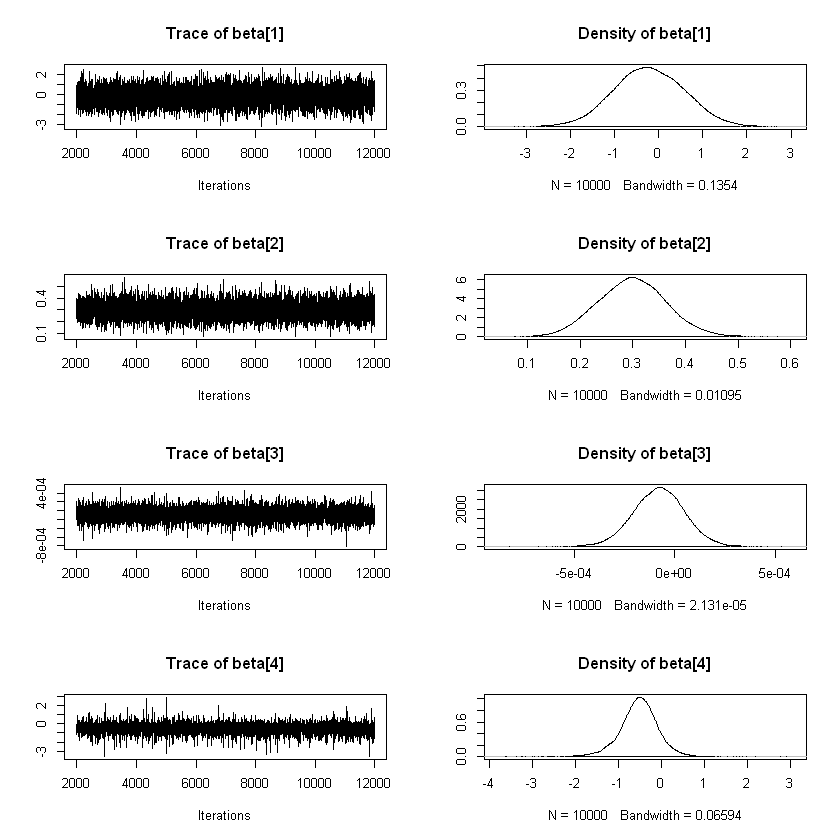

[1] 11.94072

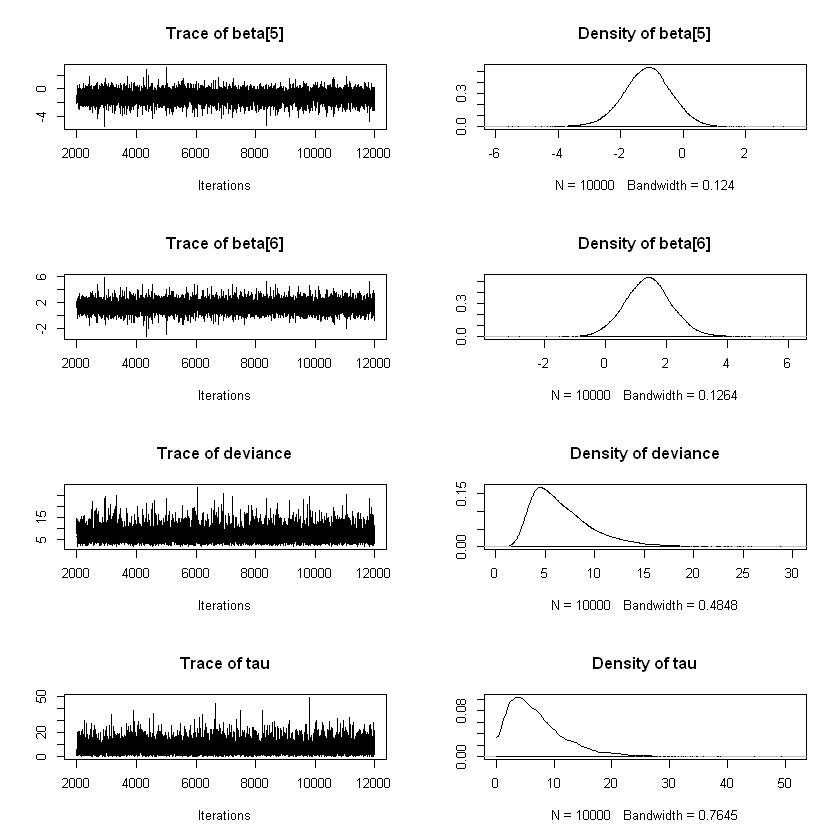

In [53]:
X.mat = matrix(c(1, 18, 70, 0, 1, 0, 1, 16, 70, 1, 0, 0, 1, 13, 66, 1, 1, 1, 1, 12, 70, 1, 0, 0, 1, 0, 0, 0 ,0 ,0, 0, 0, 1 ,0 ,0, 0), 6, 6, byrow = T)
Xtilde_inv = solve(X.mat)
y= c(4, 4.2, 3.4, 2.7, 0, 0)
D = diag(c(.3438^2, .3438^2, 0.2579^2, .3438^2, 1, 1))
beta0 = c(t(Xtilde_inv %*% y))
C0 = Xtilde_inv %*% D %*% t(Xtilde_inv)
C0inv = solve(C0)
beta0
jags.data=list(C0inv=C0inv,gg=dim(X.mat), beta0 = beta0, r=dim(X.mat)[2], FEV=smoking$FEV, Smoke=smoking$Smoke, Age=smoking$Age, Height = smoking$Hgt, Male = smoking$Male, n=dim(X.mat)[1])## note

model_4 = "model {
for(i in 1:n) {
FEV[i] ~ dnorm(mu[i],tau)
mu[i] <- beta[1] + beta[2]*Age[i] + beta[3]*Height[i]*Height[i]  + beta[4]*Male[i] + beta[5]*Smoke[i]+ beta[6]*Smoke[i]*Male[i]
}
beta[1:r] ~ dmnorm(beta0[1:r], C0inv[1:r,1:r])

tau ~ dgamma(0.001,0.001)
}"
jags.inits <- list(list(tau=1,beta=c(0,0,0,0,0,0)))
jags.param <- c("beta","tau")
FEV.fit4 <- jags(jags.data, jags.inits, jags.param,model.file=textConnection(model_4),n.chains=1, n.iter=12000, n.thin=1, n.burnin=2000)
jags.mcmc_fev=as.mcmc(FEV.fit4)
plot(jags.mcmc_fev)
DIC_full <- FEV.fit4$BUGSoutput$DIC
DIC_full

**FEV ~ Age + Height^2 + Smoker**

[1]  2.70000000  0.15000000 -0.01571429  0.58714286

Warning message in jags.model(model.file, data = data, inits = init.values, n.chains = n.chains, :
"Unused variable "gg" in data"
Warning message in jags.model(model.file, data = data, inits = init.values, n.chains = n.chains, :
"Unused variable "Male" in data"


Compiling model graph
   Resolving undeclared variables
   Allocating nodes
Graph information:
   Observed stochastic nodes: 4
   Unobserved stochastic nodes: 6
   Total graph size: 2684

Initializing model



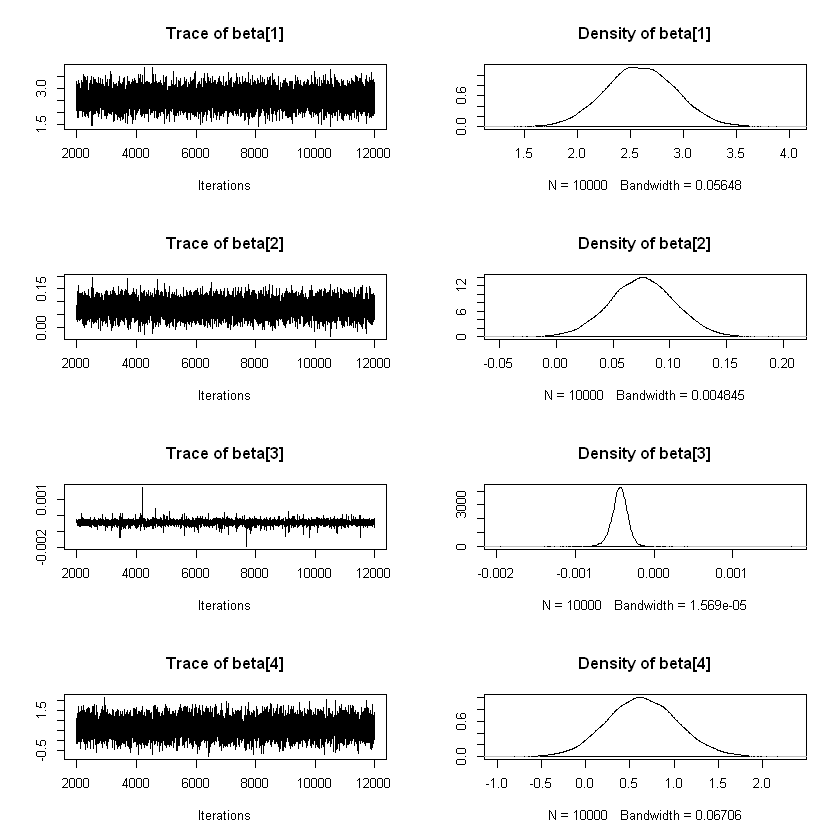

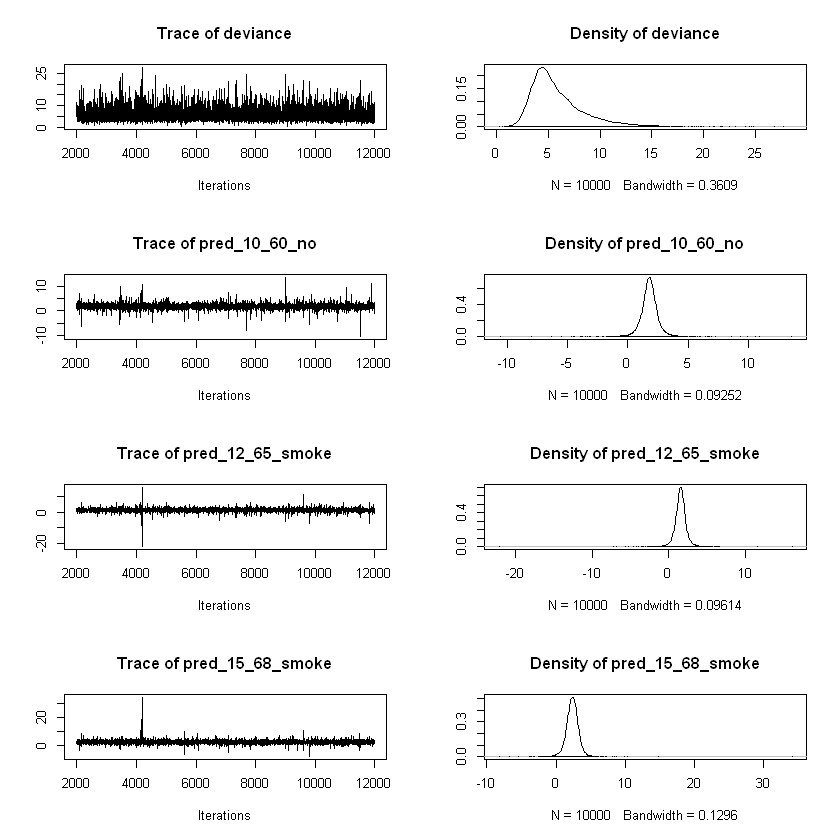

[1] 9.632996
Inference for Bugs model at "18", fit using jags,
 1 chains, each with 12000 iterations (first 2000 discarded)
 n.sims = 10000 iterations saved
                 mu.vect sd.vect   2.5%   25%   50%   75%  97.5%
beta[1]            2.597   0.336  1.944 2.372 2.596 2.825  3.254
beta[2]            0.076   0.029  0.019 0.056 0.076 0.095  0.132
beta[3]            0.000   0.000 -0.001 0.000 0.000 0.000  0.000
beta[4]            0.644   0.399 -0.132 0.373 0.639 0.910  1.445
pred_10_60_no      1.793   0.822  0.296 1.425 1.794 2.163  3.338
pred_12_65_smoke   1.515   0.850 -0.049 1.134 1.526 1.900  3.080
pred_15_68_smoke   2.370   0.995  0.528 1.853 2.379 2.886  4.107
pred_5_50_no       1.886   0.777  0.476 1.540 1.882 2.231  3.320
deviance           5.934   2.720  2.646 4.132 5.214 7.011 12.989

DIC info (using the rule, pD = var(deviance)/2)
pD = 3.7 and DIC = 9.6
DIC is an estimate of expected predictive error (lower deviance is better).


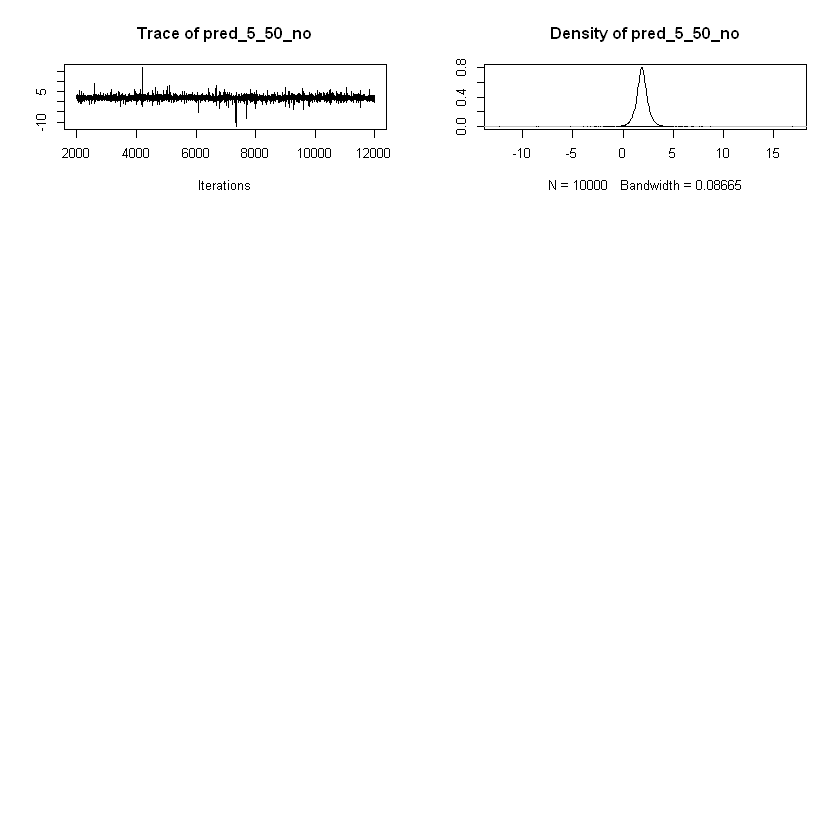

In [132]:
age = c(16, 13, 12, 0)
hgt = c(70, 66, 70, 0)
smoker = c(0, 1, 0, 0)
male = c(0, 1, 1, 1)
X.mat=model.matrix(~age + hgt + as.factor(smoker), byrow = T)
Xtilde_inv = solve(X.mat)
y= c(4, 4.2, 3.4, 2.7)
D = diag(c(.3438^2, .3438^2, 0.2579^2, .3438^2))
beta0 = c(t(Xtilde_inv %*% y))
C0 = Xtilde_inv %*% D %*% t(Xtilde_inv)
C0inv = solve(C0)
beta0
jags.data=list(C0inv=C0inv,gg=dim(X.mat), beta0 = beta0, r=dim(X.mat)[2], FEV=smoking$FEV, Smoke=smoking$Smoke, Age=smoking$Age, Height = smoking$Hgt, Male = smoking$Male, n=dim(X.mat)[1])## note

model_4 = "model {
for(i in 1:n) {
FEV[i] ~ dnorm(mu[i],tau)
mu[i] <- beta[1] + beta[2]*Age[i] + beta[3]*Height[i]*Height[i] +  beta[4]*Smoke[i]
}
beta[1:r] ~ dmnorm(beta0[1:r], C0inv[1:r,1:r])

tau ~ dgamma(0.001,0.001)

pred15_68_smoke = beta[1] + beta[2]*15 + beta[3]*68*68 + beta[4]*1 
pred_15_68_smoke ~ dnorm(pred15_68_smoke, tau)

pred5_50_no = beta[1] + beta[2]*5 + beta[3]*50*50 + beta[4]*0 
pred_5_50_no ~ dnorm(pred5_50_no, tau)

pred10_60_no = beta[1] + beta[2]*10 + beta[3]*60*60 + beta[4]*0 
pred_10_60_no ~ dnorm(pred10_60_no, tau)

pred12_65_smoke = beta[1] + beta[2]*10 + beta[3]*65*65 + beta[4]*0 
pred_12_65_smoke ~ dnorm(pred12_65_smoke, tau)

}"
jags.inits <- list(list(tau=1,beta=c(0,0,0,0)))
jags.param <- c("beta", "pred_15_68_smoke", "pred_5_50_no", "pred_10_60_no", "pred_12_65_smoke")
FEV.fit4 <- jags(jags.data, jags.inits, jags.param,model.file=textConnection(model_4),n.chains=1, n.iter=12000, n.thin=1, n.burnin=2000)
jags.mcmc_fev=as.mcmc(FEV.fit4)
plot(jags.mcmc_fev)
DIC_full <- FEV.fit4$BUGSoutput$DIC
print(DIC_full)
print(FEV.fit4)


[1]  2.70000000  0.15000000 -0.01571429  0.58714286

Warning message in jags.model(model.file, data = data, inits = init.values, n.chains = n.chains, :
"Unused variable "C0inv" in data"
Warning message in jags.model(model.file, data = data, inits = init.values, n.chains = n.chains, :
"Unused variable "gg" in data"
Warning message in jags.model(model.file, data = data, inits = init.values, n.chains = n.chains, :
"Unused variable "beta0" in data"
Warning message in jags.model(model.file, data = data, inits = init.values, n.chains = n.chains, :
"Unused variable "r" in data"
Warning message in jags.model(model.file, data = data, inits = init.values, n.chains = n.chains, :
"Unused variable "Male" in data"


Compiling model graph
   Resolving undeclared variables
   Allocating nodes
Graph information:
   Observed stochastic nodes: 4
   Unobserved stochastic nodes: 5
   Total graph size: 2636

Initializing model



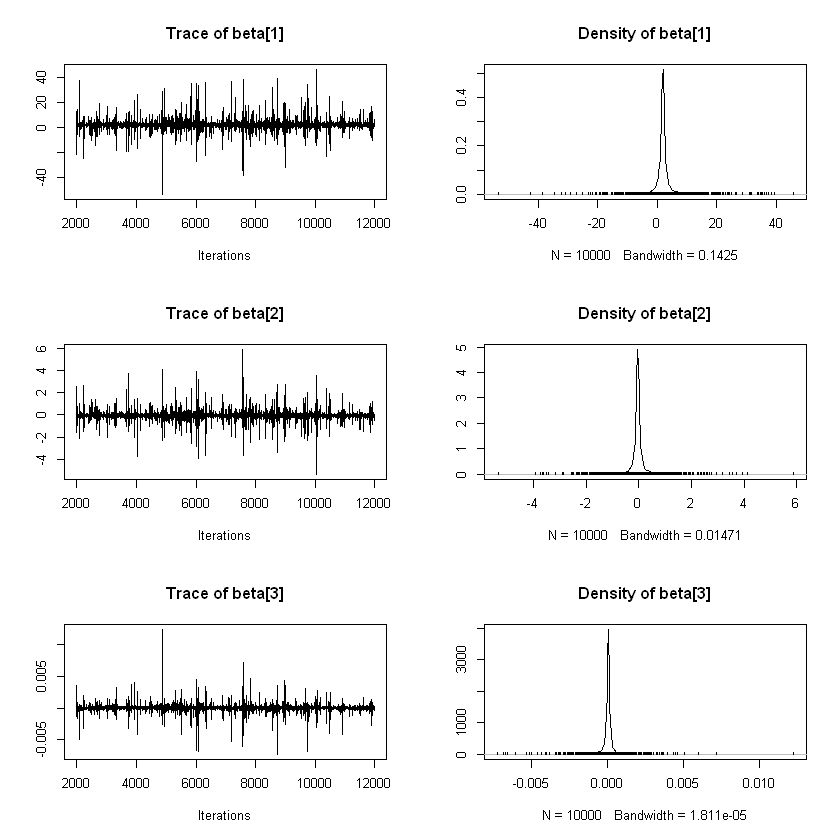

[1] 24.67066
Inference for Bugs model at "20", fit using jags,
 1 chains, each with 12000 iterations (first 2000 discarded)
 n.sims = 10000 iterations saved
         mu.vect sd.vect    2.5%     25%    50%    75%  97.5%
beta[1]    1.883   3.381  -4.101   1.295  1.871  2.431  7.855
beta[2]   -0.041   0.355  -0.678  -0.100 -0.042  0.018  0.588
beta[3]    0.000   0.000  -0.001   0.000  0.000  0.000  0.001
beta[4]   -0.293  31.617 -61.644 -21.676 -0.291 21.336 61.443
deviance  -2.612   7.387 -11.932  -8.203 -4.295  1.179 16.159

DIC info (using the rule, pD = var(deviance)/2)
pD = 27.3 and DIC = 24.7
DIC is an estimate of expected predictive error (lower deviance is better).


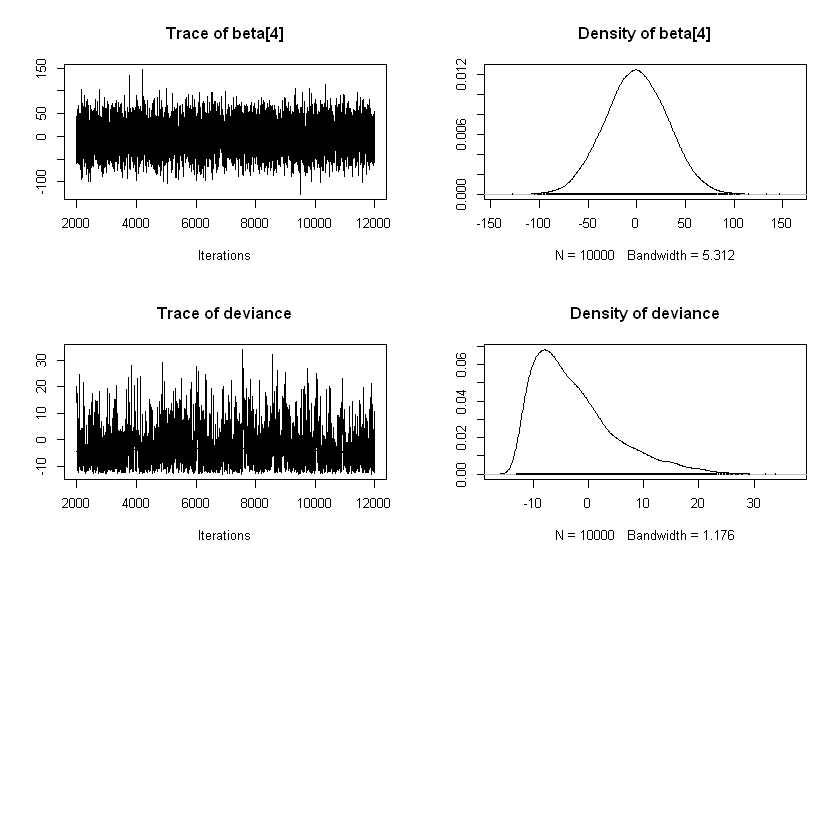

In [134]:
age = c(16, 13, 12, 0)
hgt = c(70, 66, 70, 0)
smoker = c(0, 1, 0, 0)
male = c(0, 1, 1, 1)
X.mat=model.matrix(~age + hgt + as.factor(smoker), byrow = T)
Xtilde_inv = solve(X.mat)
y= c(4, 4.2, 3.4, 2.7)
D = diag(c(.3438^2, .3438^2, 0.2579^2, .3438^2))
beta0 = c(t(Xtilde_inv %*% y))
C0 = Xtilde_inv %*% D %*% t(Xtilde_inv)
C0inv = solve(C0)
beta0
jags.data=list(C0inv=C0inv,gg=dim(X.mat), beta0 = beta0, r=dim(X.mat)[2], FEV=smoking$FEV, Smoke=smoking$Smoke, Age=smoking$Age, Height = smoking$Hgt, Male = smoking$Male, n=dim(X.mat)[1])## note

model_4 = "model {
for(i in 1:n) {
FEV[i] ~ dnorm(mu[i],tau)
mu[i] <- beta[1] + beta[2]*Age[i] + beta[3]*Height[i]*Height[i] +  beta[4]*Smoke[i]
}
#beta[1:r] ~ dmnorm(beta0[1:r], C0inv[1:r,1:r])

tau ~ dgamma(0.001,0.001)

beta[1] ~ dnorm(0,0.001)
beta[2] ~ dnorm(0,0.001)
beta[3] ~ dnorm(0,0.001)
beta[4] ~ dnorm(0,0.001)
}"
jags.inits <- list(list(tau=1,beta=c(0,0,0,0)))
jags.param <- c("beta")
FEV.fit4 <- jags(jags.data, jags.inits, jags.param,model.file=textConnection(model_4),n.chains=1, n.iter=12000, n.thin=1, n.burnin=2000)
jags.mcmc_fev=as.mcmc(FEV.fit4)
plot(jags.mcmc_fev)
DIC_full <- FEV.fit4$BUGSoutput$DIC
print(DIC_full)
print(FEV.fit4)

**FEV ~ Age + Height^2 + Male**



[1]  2.70000000  0.15000000 -0.01571429  0.58714286

Warning message in jags.model(model.file, data = data, inits = init.values, n.chains = n.chains, :
"Unused variable "gg" in data"
Warning message in jags.model(model.file, data = data, inits = init.values, n.chains = n.chains, :
"Unused variable "Smoke" in data"


Compiling model graph
   Resolving undeclared variables
   Allocating nodes
Graph information:
   Observed stochastic nodes: 4
   Unobserved stochastic nodes: 2
   Total graph size: 2660

Initializing model

Inference for Bugs model at "21", fit using jags,
 1 chains, each with 12000 iterations (first 2000 discarded)
 n.sims = 10000 iterations saved
         mu.vect sd.vect   2.5%    25%   50%   75%  97.5%
beta[1]    2.618   0.332  1.957  2.398 2.614 2.840  3.267
beta[2]    0.082   0.029  0.026  0.062 0.082 0.101  0.138
beta[3]    0.000   0.000 -0.001 -0.001 0.000 0.000  0.000
beta[4]    0.282   0.395 -0.455  0.006 0.275 0.545  1.081
tau        3.767   4.182  0.198  1.162 2.471 4.794 14.939
deviance   8.076   3.429  2.360  5.800 7.772 9.910 15.908

DIC info (using the rule, pD = var(deviance)/2)
pD = 5.9 and DIC = 14.0
DIC is an estimate of expected predictive error (lower deviance is better).


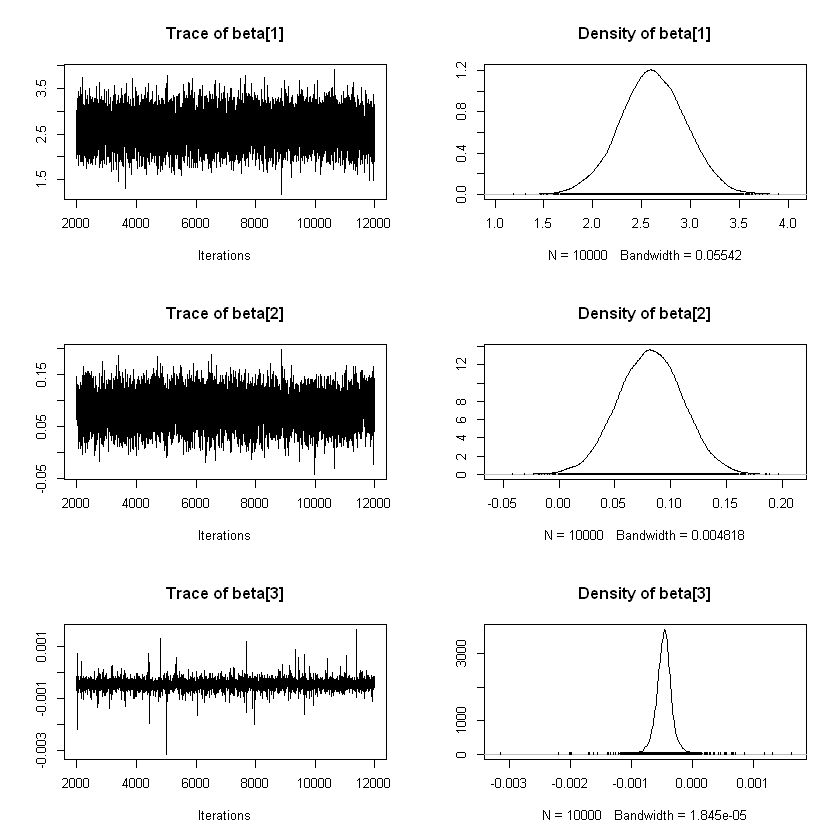


Iterations = 2001:12000
Thinning interval = 1 
Number of chains = 1 
Sample size per chain = 10000 

1. Empirical mean and standard deviation for each variable,
   plus standard error of the mean:

               Mean        SD  Naive SE Time-series SE
beta[1]   2.6176378 0.3321032 3.321e-03      3.382e-03
beta[2]   0.0818898 0.0286808 2.868e-04      3.009e-04
beta[3]  -0.0004687 0.0001546 1.546e-06      1.593e-06
beta[4]   0.2819942 0.3947311 3.947e-03      5.284e-03
deviance  8.0758502 3.4290954 3.429e-02      5.797e-02
tau       3.7665550 4.1815156 4.182e-02      6.394e-02

2. Quantiles for each variable:

               2.5%        25%        50%        75%      97.5%
beta[1]   1.9567386  2.3979695  2.6140242  2.8399768  3.2671489
beta[2]   0.0263128  0.0623282  0.0819211  0.1013227  0.1383890
beta[3]  -0.0007588 -0.0005426 -0.0004656 -0.0003954 -0.0001853
beta[4]  -0.4551742  0.0057319  0.2746045  0.5454208  1.0810260
deviance  2.3600056  5.7997590  7.7723229  9.9096128 15.907558

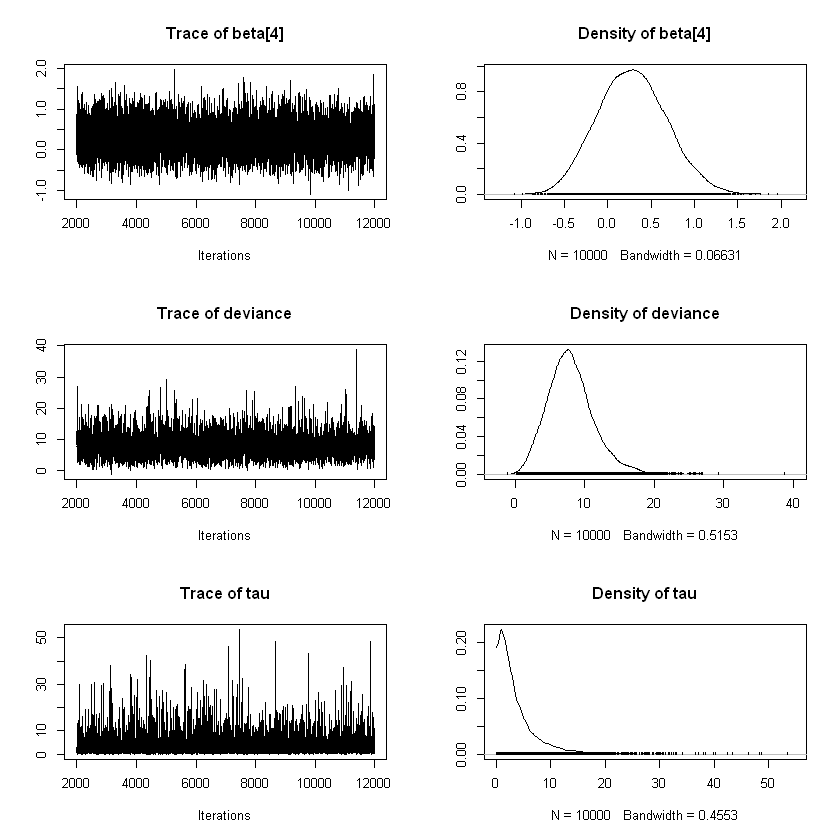

In [135]:
age = c(16, 13, 12, 0)
hgt = c(70, 66, 70, 0)
#smoker = c(0, 1, 0, 0)
male = c(0, 1, 1, 1)
X.mat=model.matrix(~age + hgt + as.factor(smoker), byrow = T)
Xtilde_inv = solve(X.mat)
y= c(4, 4.2, 3.4, 2.7)
D = diag(c(.3438^2, .3438^2, 0.2579^2, .3438^2))
beta0 = c(t(Xtilde_inv %*% y))
C0 = Xtilde_inv %*% D %*% t(Xtilde_inv)
C0inv = solve(C0)
beta0
jags.data=list(C0inv=C0inv,gg=dim(X.mat), beta0 = beta0, r=dim(X.mat)[2], FEV=smoking$FEV, Smoke=smoking$Smoke, Age=smoking$Age, Height = smoking$Hgt, Male = smoking$Male, n=dim(X.mat)[1])## note

model_4 = "model {
for(i in 1:n) {
FEV[i] ~ dnorm(mu[i],tau)
mu[i] <- beta[1] + beta[2]*Age[i] + beta[3]*Height[i]*Height[i] +  beta[4]*Male[i]
}
beta[1:r] ~ dmnorm(beta0[1:r], C0inv[1:r,1:r])

tau ~ dgamma(0.001,0.001)
}"
jags.inits <- list(list(tau=1,beta=c(0,0,0,0)))
jags.param <- c("beta","tau")
FEV.fit4 <- jags(jags.data, jags.inits, jags.param,model.file=textConnection(model_4),n.chains=1, n.iter=12000, n.thin=1, n.burnin=2000)
jags.mcmc_fev=as.mcmc(FEV.fit4)
print(FEV.fit4)
plot(jags.mcmc_fev)
summary(jags.mcmc_fev)
DIC_full <- FEV.fit4$BUGSoutput$DIC

**FEV ~ Age + Height + Male**

[1]  2.70000000  0.15000000 -0.01571429  0.58714286

Warning message in jags.model(model.file, data = data, inits = init.values, n.chains = n.chains, :
"Unused variable "gg" in data"
Warning message in jags.model(model.file, data = data, inits = init.values, n.chains = n.chains, :
"Unused variable "Smoke" in data"


Compiling model graph
   Resolving undeclared variables
   Allocating nodes
Graph information:
   Observed stochastic nodes: 4
   Unobserved stochastic nodes: 2
   Total graph size: 2660

Initializing model



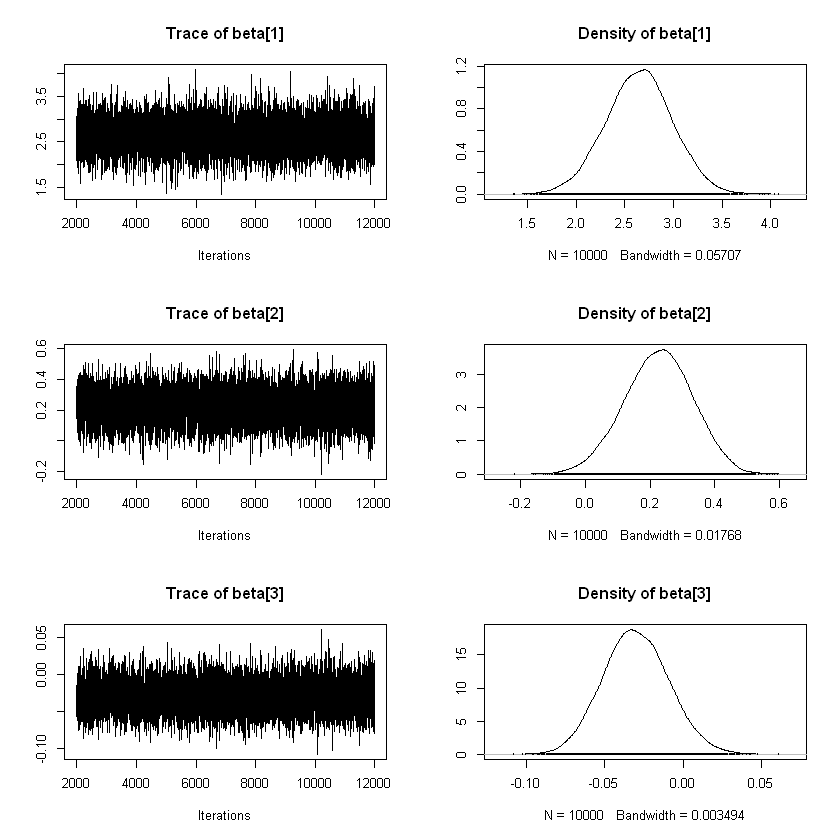


Iterations = 2001:12000
Thinning interval = 1 
Number of chains = 1 
Sample size per chain = 10000 

1. Empirical mean and standard deviation for each variable,
   plus standard error of the mean:

             Mean     SD Naive SE Time-series SE
beta[1]   2.64710 0.3432 0.003432      0.0034322
beta[2]   0.22584 0.1052 0.001052      0.0012342
beta[3]  -0.03015 0.0208 0.000208      0.0002402
beta[4]   0.46599 0.3950 0.003950      0.0045074
deviance 14.52425 2.3260 0.023260      0.0290786
tau       0.64765 0.5957 0.005957      0.0078463

2. Quantiles for each variable:

             2.5%      25%     50%      75%    97.5%
beta[1]   1.96497  2.41992  2.6511  2.87514  3.31908
beta[2]   0.01412  0.15596  0.2283  0.29827  0.42478
beta[3]  -0.06974 -0.04432 -0.0307 -0.01632  0.01153
beta[4]  -0.29995  0.19804  0.4674  0.73588  1.24137
deviance 10.36411 13.00392 14.4163 15.85188 19.70541
tau       0.06373  0.26101  0.4775  0.83832  2.26405


[1] 17.22936


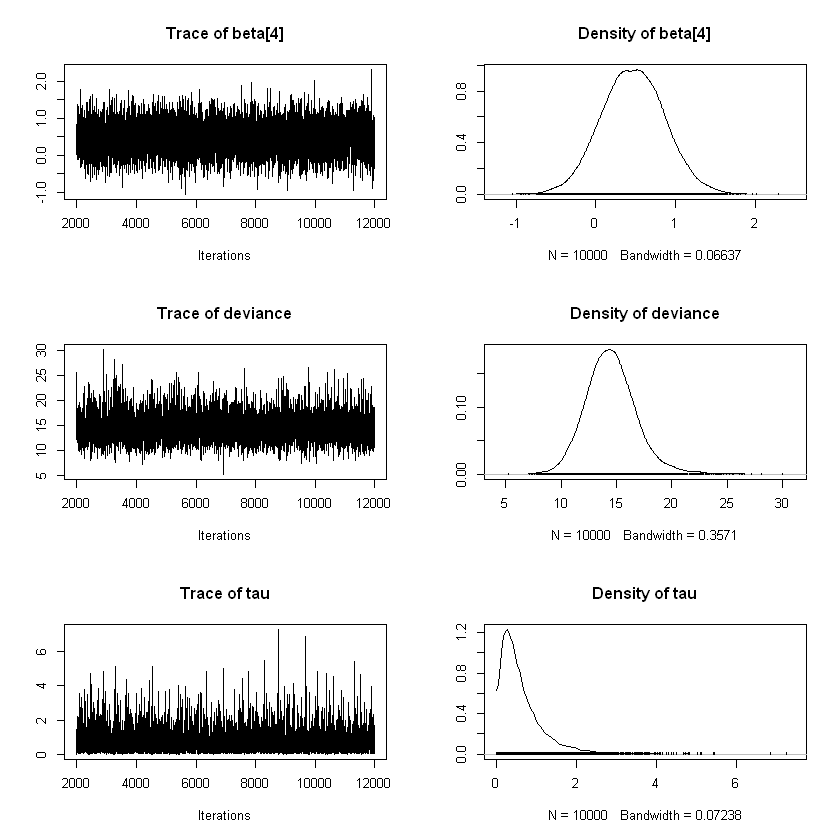

In [111]:
age = c(16, 13, 12, 0)
hgt = c(70, 66, 70, 0)
#smoker = c(0, 1, 0, 0)
male = c(0, 1, 1, 1)
X.mat=model.matrix(~age + hgt + as.factor(smoker), byrow = T)
Xtilde_inv = solve(X.mat)
y= c(4, 4.2, 3.4, 2.7)
D = diag(c(.3438^2, .3438^2, 0.2579^2, .3438^2))
beta0 = c(t(Xtilde_inv %*% y))
C0 = Xtilde_inv %*% D %*% t(Xtilde_inv)
C0inv = solve(C0)
beta0
jags.data=list(C0inv=C0inv,gg=dim(X.mat), beta0 = beta0, r=dim(X.mat)[2], FEV=smoking$FEV, Smoke=smoking$Smoke, Age=smoking$Age, Height = smoking$Hgt, Male = smoking$Male, n=dim(X.mat)[1])## note

model_4 = "model {
for(i in 1:n) {
FEV[i] ~ dnorm(mu[i],tau)
mu[i] <- beta[1] + beta[2]*Age[i] + beta[3]*Height[i] +  beta[4]*Male[i]
}
beta[1:r] ~ dmnorm(beta0[1:r], C0inv[1:r,1:r])

tau ~ dgamma(0.001,0.001)
}"
jags.inits <- list(list(tau=1,beta=c(0,0,0,0)))
jags.param <- c("beta","tau")
FEV.fit4 <- jags(jags.data, jags.inits, jags.param,model.file=textConnection(model_4),n.chains=1, n.iter=12000, n.thin=1, n.burnin=2000)
jags.mcmc_fev=as.mcmc(FEV.fit4)
plot(jags.mcmc_fev)
summary(jags.mcmc_fev)
DIC_full <- FEV.fit4$BUGSoutput$DIC
print(DIC_full)

**9.22 The Coleman Report Data**

Conduct a Bayesian regression using proper reference priors. Present a scatterplot of the data with the estimated regression line and a point-wise 95% probability band. Predict the value for new schools with x = -16.04. Present posterior inferences for parameters in an appropriately designed table. Would you be surprised if socioeconomic status were positive associated with higher test scores? 

My model found the intercept to be 33.3 and the coefficient for the socioeconomic status measurement to be .561, so we'd predict a school with x = -16.04 to have average test scores of 24.3. Unfortunately I wasn't sure how to add in the the 95% probability band onto my plot: I tried looking it up but failed to find anything that was simple. 

It is not surprising at all the socioeconomic status may be positively associated with higher test scores. Students from wealthier families may have more time to focus on school, parents with more time to help them, more educated parents, better educational resources at home, better out-of-school resources, a greater personal incentive to perform well academically, etc. All of that is on the individual level: on the school-wide level, schools in wealthy areas could also get more funding, have better teachers, emphasize standardized test practice as a core curriculum component, etc. There are a number of things that could explain this. 

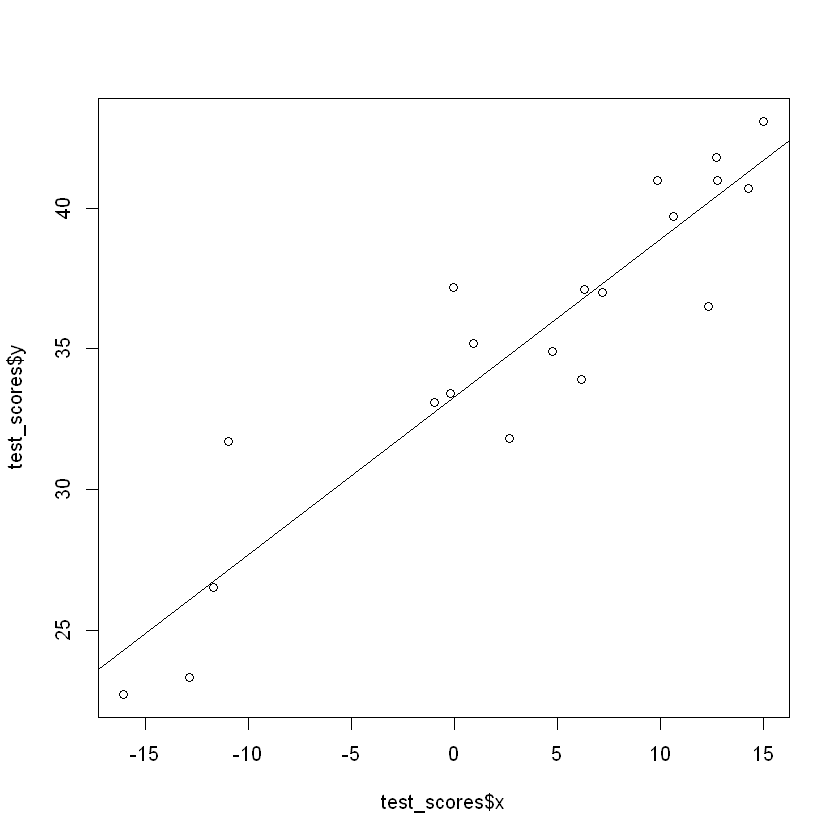

In [103]:
plot(test_scores$x, test_scores$y)
abline(33.300, 0.561)

In [68]:
test_scores<-read.table("test_scores.txt", header=TRUE, sep="")

In [100]:
test_model <- " model{
    for(i in 1:n){
        y[i] ~ dnorm(mu[i], prec)
        mu[i] = beta[1] + beta[2]*x[i]
                }            
    for(i in 1:2){
        beta[i] ~ dnorm(0,0.001)
    }
        prec ~ dgamma(0.001,0.001)
        sig2 = 1.0 / prec
        sig = sqrt(sig2)
}"
set.seed(50)
data1_jags = list(y = test_scores$y, n = nrow(test_scores), x = test_scores$x)
params1 = c("beta", "sig")
model <- jags.model(textConnection(test_model), data = data1_jags, inits = NULL, n.chains = 3, quiet=TRUE)

In [102]:
jags.param <- c("beta")

jags.fit <- jags(data1_jags, parameters.to.save=jags.param,model.file=textConnection(test_model),n.chains=1,n.iter=3000, n.thin=1, n.burnin=1000)

Compiling model graph
   Resolving undeclared variables
   Allocating nodes
Graph information:
   Observed stochastic nodes: 20
   Unobserved stochastic nodes: 3
   Total graph size: 89

Initializing model



In [94]:
library(bayesplot)
jags.mcmc=as.mcmc(jags.fit)

Inference for Bugs model at "8", fit using jags,
 1 chains, each with 3000 iterations (first 1000 discarded)
 n.sims = 2000 iterations saved
         mu.vect sd.vect   2.5%    25%    50%    75%  97.5%
beta[1]   33.300   0.552 32.225 32.947 33.284 33.677 34.389
beta[2]    0.561   0.058  0.449  0.522  0.561  0.599  0.676
deviance  90.161   2.532 87.159 88.298 89.512 91.323 96.921

DIC info (using the rule, pD = var(deviance)/2)
pD = 3.2 and DIC = 93.4
DIC is an estimate of expected predictive error (lower deviance is better).


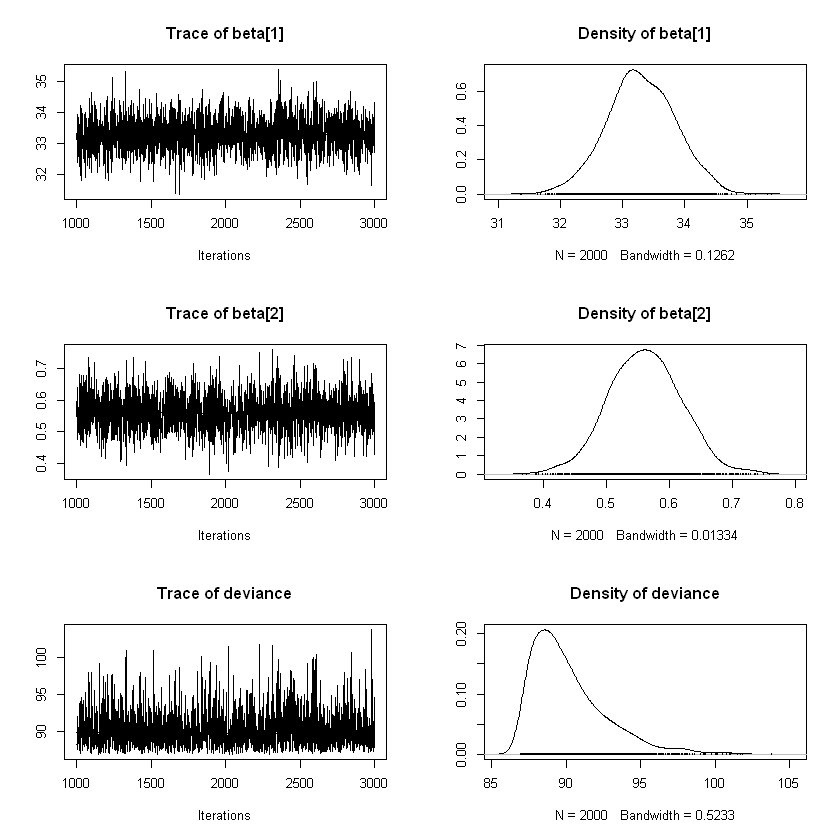

In [95]:
plot(jags.mcmc)
print(jags.fit)